<a href="https://colab.research.google.com/github/KiyeopYang/ML/blob/main/Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision
!pip install Pillow

In [ ]:
import torch
import torch.optim as optim
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
vgg = models.vgg19(pretrained=True).features
for param in vgg.parameters():
  param.requires_grad_(False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg.to(device)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [ ]:
def load_image(img_path, max_size=400, shape=None) :
  image = Image.open(img_path).convert('RGB')
  if max(image.size) > max_size:
    size = max_size
  else:
    size = max(image.size)

  if shape is not None:
    size = shape
  
  in_transform = transforms.Compose([
      transforms.Resize(size),
      transforms.ToTensor(),
      transforms.Normalize((
          0.5, 0.5, 0.5
      ), (
          0.5, 0.5, 0.5
      ))
  ])

  image = in_transform(image).unsqueeze(0)
  return image

In [ ]:
content = load_image('dogpre.JPG').to(device)
style = load_image('g4.jpg', shape=content.shape[-2:]).to(device)

In [ ]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.squeeze()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

(-0.5, 558.5, 399.5, -0.5)

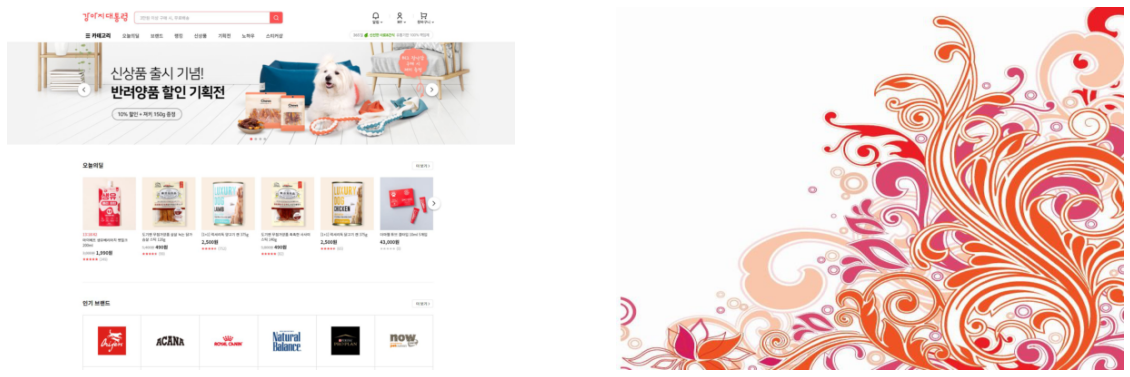

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(im_convert(content))
ax1.axis('off')
ax2.imshow(im_convert(style))
ax2.axis('off')


In [ ]:
def get_features(image, model):
  layers = {
      '0': 'conv1_1',
      '5': 'conv2_1',
      '10': 'conv3_1',
      '19': 'conv4_1',
      '21': 'conv4_2', #content extraction
      '28': 'conv5_1'
  }
  features = {}

  for name, layer in model._modules.items():
    image = layer(image)
    if name in layers:
      features[layers[name]] = image
  return features

In [ ]:
content_features = get_features(content, vgg)
style_features = get_features(style, vgg)

In [ ]:
def gram_matrix(tensor):
  _, d, h, w = tensor.size()
  tensor = tensor.view(d, h*w)
  gram = torch.mm(tensor, tensor.t())
  return gram


In [ ]:
style_grams = {
    layer: gram_matrix(style_features[layer]) for layer in style_features
}


In [ ]:
style_weights = {
    'conv1_1': 1, 'conv2_1': .75, 'conv3_1' : 0.2, 'conv4_1': 0.2, 'conv5_1': 0.2
}

content_weight = 1
style_weight = 1e6

In [ ]:
target = content.clone().requires_grad_(True).to(device)

In [ ]:
show_every = 300
optimizer = optim.Adam([target], lr=0.003)
steps = 9000

height, width, channels = im_convert(target).shape
image_array = np.empty(shape=(300, height, width, channels))
capture_frame = steps / 300
counter = 0

Total loss:  7344350.5
Iteration:  300


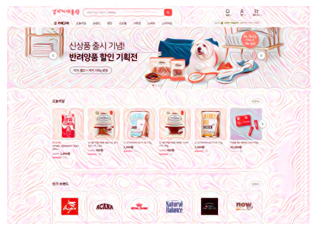

Total loss:  3469035.5
Iteration:  600


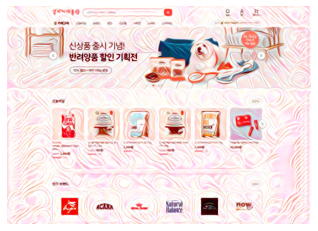

Total loss:  2130132.0
Iteration:  900


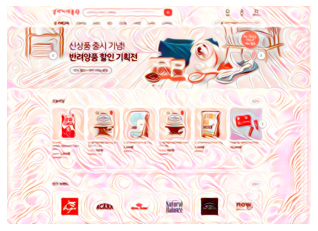

Total loss:  1501666.0
Iteration:  1200


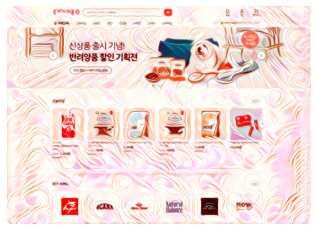

Total loss:  1141709.875
Iteration:  1500


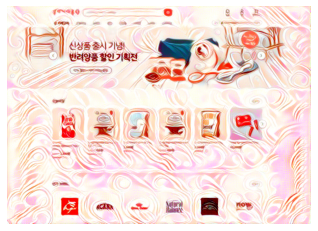

Total loss:  905616.125
Iteration:  1800


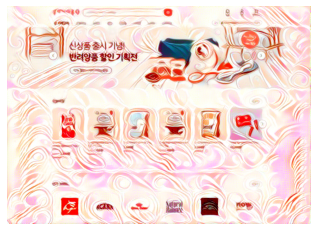

Total loss:  739547.75
Iteration:  2100


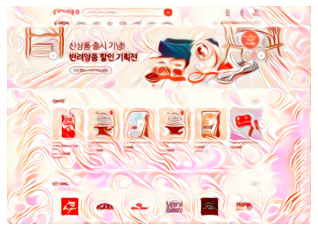

Total loss:  616454.5
Iteration:  2400


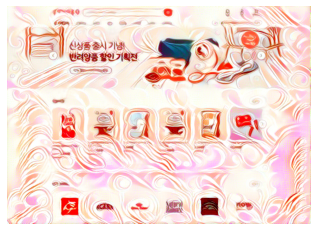

Total loss:  520855.75
Iteration:  2700


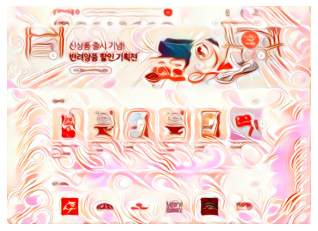

Total loss:  445277.0
Iteration:  3000


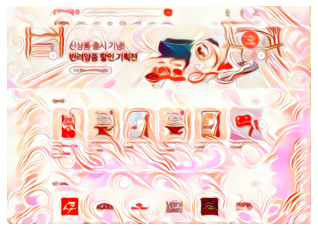

Total loss:  384519.40625
Iteration:  3300


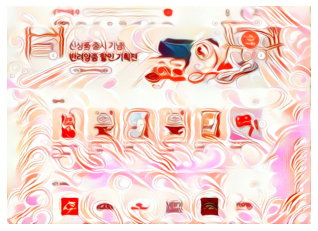

Total loss:  336641.96875
Iteration:  3600


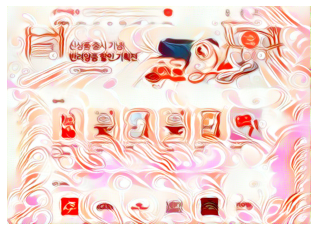

Total loss:  297508.53125
Iteration:  3900


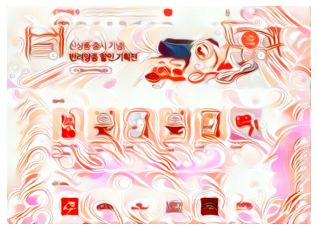

Total loss:  264648.8125
Iteration:  4200


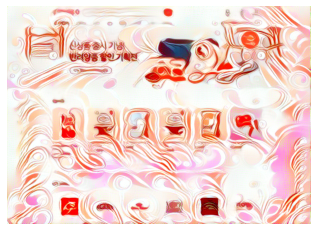

Total loss:  236803.65625
Iteration:  4500


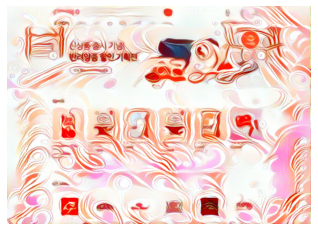

Total loss:  212982.75
Iteration:  4800


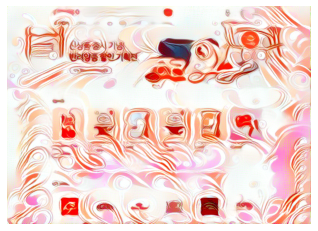

Total loss:  193780.625
Iteration:  5100


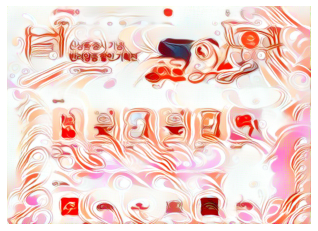

Total loss:  177326.015625
Iteration:  5400


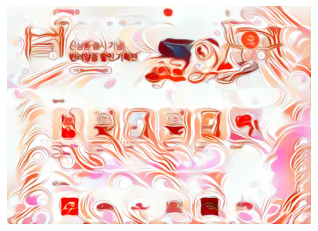

Total loss:  163051.578125
Iteration:  5700


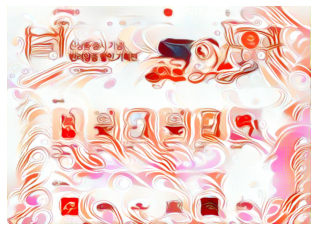

Total loss:  150825.4375
Iteration:  6000


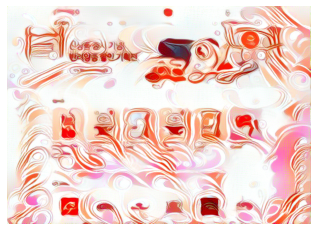

Total loss:  141856.328125
Iteration:  6300


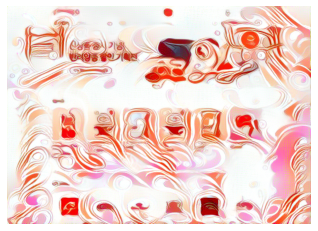

Total loss:  132762.0625
Iteration:  6600


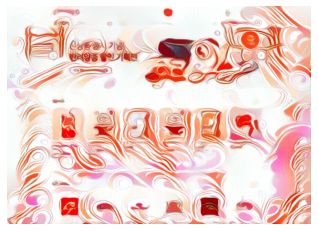

Total loss:  125183.71875
Iteration:  6900


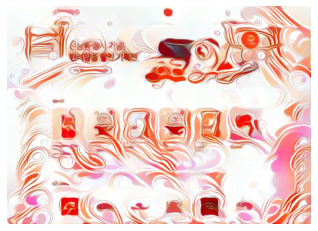

Total loss:  118981.078125
Iteration:  7200


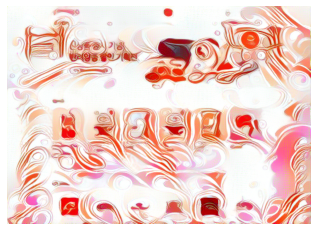

Total loss:  113681.140625
Iteration:  7500


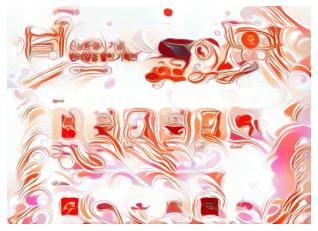

Total loss:  109443.296875
Iteration:  7800


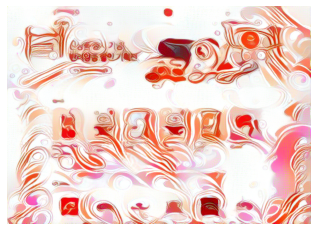

Total loss:  105814.4765625
Iteration:  8100


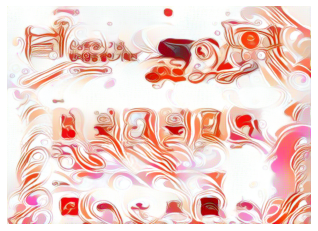

Total loss:  102516.375
Iteration:  8400


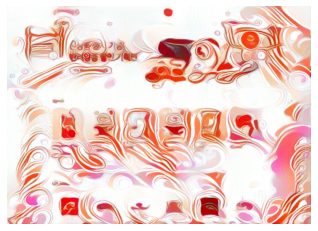

Total loss:  100861.53125
Iteration:  8700


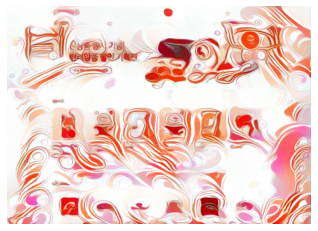

Total loss:  97611.53125
Iteration:  9000


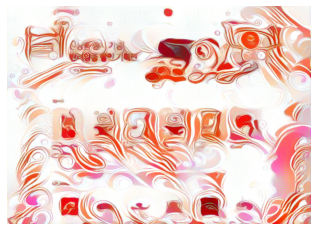

In [ ]:
for ii in range(1, steps+1):
  target_features = get_features(target, vgg)
  content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2'])**2)
  style_loss = 0
  
  for layer in style_weights:
    target_feature = target_features[layer]
    target_gram = gram_matrix(target_feature)
    style_gram = style_grams[layer]
    layer_style_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
    _, d, h, w = target_feature.shape
    style_loss += layer_style_loss / (d * h * w)

  total_loss = content_loss * content_weight + style_loss * style_weight

  optimizer.zero_grad()
  total_loss.backward()
  optimizer.step()

  if ii % show_every == 0 :
    print('Total loss: ', total_loss.item())
    print('Iteration: ', ii)
    plt.imshow(im_convert(target))
    plt.axis('off')
    plt.show()
  if ii % capture_frame == 0:
    image_array[counter] = im_convert(target)
    counter = counter + 1







(-0.5, 558.5, 399.5, -0.5)

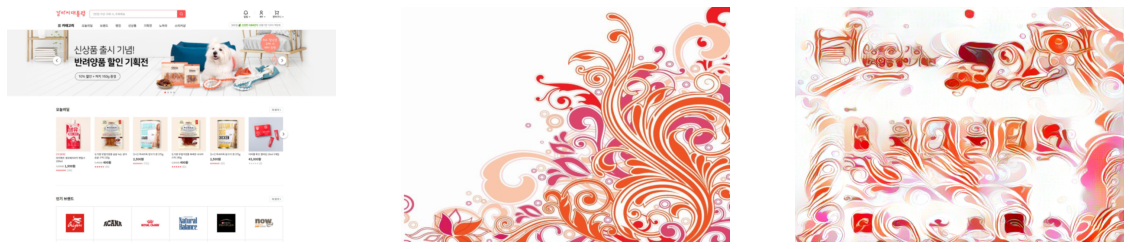

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.imshow(im_convert(content))
ax1.axis('off')
ax2.imshow(im_convert(style))
ax2.axis('off')
ax3.imshow(im_convert(target))
ax3.axis('off')